In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm

Разобраться, влияет ли то, кто из соперников подавал, на результаты Надаля.
Если да, как именно


Мы имеем 3 таблицы: таблица по подаче, таблица по приему и общая таблица.

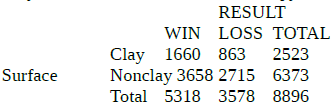

In [ ]:
# Результаты Надаля на глиняных и других кортах — геймы, в которых он подавал
#                  WIN   LOSS    TOTAL
#         Clay     1090   171    1261
# Surface Nonclay  2747   446    3193
#         Total    3837   617    4454

In [ ]:
# Результаты Надаля на глиняных и других кортах — геймы, в которых он принимал подачу
#                    WIN   LOSS     TOTAL
#            Clay    570   692      1262
# Surface    Nonclay 911   2269     3180
#            Total   1481  2961     4442

Получим 2*2 таблицу.

столбцы - победа и проигрыш

строки - подача и прием.

In [ ]:
#          WIN     LOSS     TOTAL
#Подавал   1481     2961     4442
#Принимал  3837     617      4454

In [ ]:
print('Доля случаев, когда Надаль выигрывает подающим', 1481/4442)

Доля случаев, когда Надаль выигрывает подающим 0.33340837460603334


In [ ]:
print('Доля случаев, когда Надаль проигрывает подающим', 2961/4442)

Доля случаев, когда Надаль проигрывает подающим 0.6665916253939667


In [ ]:
print('Доля случаев, когда Надаль выигрывает принимающим', 3837/4454)

Доля случаев, когда Надаль выигрывает принимающим 0.8614728334081724


In [ ]:
print('Доля случаев, когда Надаль проигрывает принимающим', 617/4454)

Доля случаев, когда Надаль проигрывает принимающим 0.13852716659182757


Вопрос: Верно ли, что результаты Надаля на кортах с глиняным покрытием выше, чем на других
покрытиях?

Гипотеза 0: доли выигрыша равны

H0: $\mu = M$<br>
H1: $\mu \ne M$<br>

выборка А - продает

выборка И - подает

In [ ]:
#   Версия 1. Прямые вычисления

s1 = 1481 #  число успехов     выборка А
n1 = 4442 #  число испытаний   выборка А
s2 = 3837 #  число успехов     выборка Б
n2 = 4454 #  число испытаний   выборка Б
p1 = s1/n1            #  оценка вероятности успеха выборка А
p2 = s2/n2            #  оценка вероятности успеха выборка Б
p = (s1 + s2)/(n1+n2) #  оценка вероятности успеха выборка А+Б
z = (p2-p1)/ ((p*(1-p)*((1/n1)+(1/n2)))**0.5)     #  z-метка

p_value = norm.cdf(-abs(z))

#  z-метка и p-значение
print(['{:.12f}'.format(a) for a in (abs(z), p_value * 2)])

['50.787212211865', '0.000000000000']


In [ ]:
#   Версия 2. Используем  proportions_ztest

z1, p_value1 = sm.stats.proportions_ztest([s1, s2], [n1, n2])

print(['{:.12f}'.format(b) for b in (z1, p_value1)])

['-50.787212211865', '0.000000000000']


In [ ]:
#   Версия 3. Используем  chi2_contingency

arr = np.array([[s1, n1-s1], [s2, n2-s2]])
chi2, p_value3, dof, exp = chi2_contingency(arr, correction=False)

print(['{:.12f}'.format(d) for d in (chi2**0.5, p_value3)])

['50.787212211865', '0.000000000000']


Все решения дают один и тот же ответ! p-value < 0.05

Нулевую гипотезу отвергаем